<a href="https://colab.research.google.com/github/nivasharmaa/Stock-Market-Sentiment-Analysis/blob/main/Stock_Market_Sentiment_Analysis(final_prototype).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/nivasharmaa/Stock-Market-Sentiment-Analysis.git


fatal: destination path 'Stock-Market-Sentiment-Analysis' already exists and is not an empty directory.


In [2]:
pip install vaderSentiment


In [3]:
pip install textblob

In [4]:
!python3 -m textblob.download_corpora --quiet

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
Finished.


In [5]:
!pip install -U textblob nltk
!python3 -m textblob.download_corpora --quiet

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
Finished.


In [6]:
#Import the libraries
import pandas as pd
import numpy as np
import yfinance as yf
import plotly.graph_objects as go
from textblob import TextBlob
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [28]:
!pip install curl_cffi --quiet

In [29]:
pip install yfinance --upgrade --quiet


In [30]:
#yfinance api

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

In [31]:
msft = yf.Ticker("MSFT")

In [32]:
print(msft)

yfinance.Ticker object <MSFT>


In [33]:
from curl_cffi import requests

session = requests.Session(impersonate="chrome")
msft = yf.Ticker("MSFT", session=session)

# Now safely fetch stock data
msft = msft.history(period="2y")
print(msft.head())


                                 Open        High         Low       Close  \
Date                                                                        
2023-05-10 00:00:00-04:00  303.788360  308.099793  302.853251  307.420593   
2023-05-11 00:00:00-04:00  305.245243  306.249263  301.465364  305.255066   
2023-05-12 00:00:00-04:00  305.688124  305.786565  301.799982  304.132874   
2023-05-15 00:00:00-04:00  304.260915  305.048379  302.774545  304.615265   
2023-05-16 00:00:00-04:00  304.979426  308.798687  304.979426  306.859528   

                             Volume  Dividends  Stock Splits  
Date                                                          
2023-05-10 00:00:00-04:00  30078000        0.0           0.0  
2023-05-11 00:00:00-04:00  31680200        0.0           0.0  
2023-05-12 00:00:00-04:00  19758100        0.0           0.0  
2023-05-15 00:00:00-04:00  16336500        0.0           0.0  
2023-05-16 00:00:00-04:00  26730300        0.0           0.0  


In [34]:
msft.info

<bound method DataFrame.info of                                  Open        High         Low       Close  \
Date                                                                        
2023-05-10 00:00:00-04:00  303.788360  308.099793  302.853251  307.420593   
2023-05-11 00:00:00-04:00  305.245243  306.249263  301.465364  305.255066   
2023-05-12 00:00:00-04:00  305.688124  305.786565  301.799982  304.132874   
2023-05-15 00:00:00-04:00  304.260915  305.048379  302.774545  304.615265   
2023-05-16 00:00:00-04:00  304.979426  308.798687  304.979426  306.859528   
...                               ...         ...         ...         ...   
2025-05-05 00:00:00-04:00  432.869995  439.500000  432.109985  436.170013   
2025-05-06 00:00:00-04:00  432.200012  437.730011  431.170013  433.309998   
2025-05-07 00:00:00-04:00  433.839996  438.119995  431.109985  433.350006   
2025-05-08 00:00:00-04:00  437.929993  443.670013  435.660004  438.170013   
2025-05-09 00:00:00-04:00  440.279999  440.579987  435.880005  438.730011   

                             Volume  Dividends  Stock Splits  
Date                                                          
2023-05-10 00:00:00-04:00  30078000        0.0           0.0  
2023-05-11 00:00:00-04:00  31680200        0.0           0.0  
2023-05-12 00:00:00-04:00  19758100        0.0           0.0  
2023-05-15 00:00:00-04:00  16336500        0.0           0.0  
2023-05-16 00:00:00-04:00  26730300        0.0           0.0  
...                             ...        ...           ...  
2025-05-05 00:00:00-04:00  20136100        0.0           0.0  
2025-05-06 00:00:00-04:00  15104200        0.0           0.0  
2025-05-07 00:00:00-04:00  23307200        0.0           0.0  
2025-05-08 00:00:00-04:00  23491300        0.0           0.0  
2025-05-09 00:00:00-04:00  14597331        0.0           0.0  

[502 rows x 7 columns]>

In [35]:
import yfinance as yf

msft = yf.Ticker("MSFT")  # Microsoft ticker
hist = msft.history(period="max")

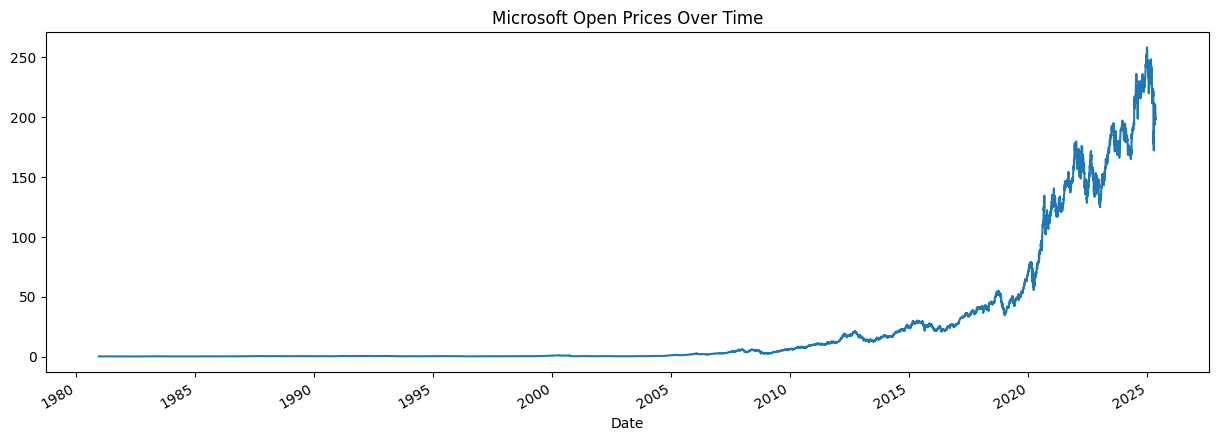

In [36]:
import yfinance as yf

msft = yf.Ticker("AAPL")
hist = msft.history(period="max")

if hist.empty:
    print("No data returned for MSFT. Check ticker or API status.")
else:
    hist['Open'].plot(figsize=(15, 5), title="Microsoft Open Prices Over Time")


In [37]:
#pulling a list of stocks
#Fastenal Co. (ticker: FAST)	13.8%
#CME Group Inc. (CME)	12.1%
#Brown & Brown Inc. (BRO)	20.0%
#Brinker International Inc. (EAT)	47.0%
#WR Berkley Corp. (WRB)	1.6%
#Exelon Corp. (EXC)	8.4%
#General Motors Co. (GM)	31.2%
#Cisco Systems Inc. (CSCO)	20.4%
#T-Mobile US Inc. (TMUS)	7.9%
#Bank of New York Mellon Corp. (BK)

In [38]:
stocks = ['^GSPC', 'FAST', 'CME', 'BRO', 'EAT', 'WRB', 'EXC', 'GM', 'CSCO', 'TMUS', 'AMZN', 'AAPL', 'META', 'BK']

In [39]:
for s in stocks:
  tkr = yf.Ticker(s)
  break

In [40]:
history = tkr.history(period="3y")
hists = {}
hists[s] = history

In [41]:
history

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-05-10 00:00:00-04:00,4035.179932,4068.820068,3958.169922,4001.050049,5885820000,0.0,0.0
2022-05-11 00:00:00-04:00,3990.080078,4049.090088,3928.820068,3935.179932,5816140000,0.0,0.0
2022-05-12 00:00:00-04:00,3903.949951,3964.800049,3858.870117,3930.080078,6286450000,0.0,0.0
2022-05-13 00:00:00-04:00,3963.899902,4038.879883,3963.899902,4023.889893,5183340000,0.0,0.0
2022-05-16 00:00:00-04:00,4013.020020,4046.459961,3983.989990,4008.010010,4415030000,0.0,0.0
...,...,...,...,...,...,...,...
2025-05-05 00:00:00-04:00,5655.319824,5683.379883,5634.479980,5650.379883,4358260000,0.0,0.0
2025-05-06 00:00:00-04:00,5605.870117,5649.580078,5586.040039,5606.910156,4717260000,0.0,0.0
2025-05-07 00:00:00-04:00,5614.180176,5654.729980,5578.640137,5631.279785,4987440000,0.0,0.0


In [42]:
temp_df = hists['^GSPC'].copy()

In [43]:
pip install plotly


In [44]:
import plotly.graph_objects as go


In [45]:
fig = go.Figure(data=[go.Candlestick(x=temp_df.index,
      open=temp_df['Open'],
      high=temp_df['High'],
      low=temp_df['Low'],
      close=temp_df['Close'])])

fig.show()

In [46]:
for ticker in stocks:
    try:
        data = yf.Ticker(ticker).history(period="3y")
        if not data.empty:
            hists[ticker] = data
            print(f"Loaded: {ticker}")
        else:
            print(f"⚠️ Empty data for: {ticker}")
    except Exception as e:
        print(f"Failed to load {ticker}: {e}")


Loaded: ^GSPC
Loaded: FAST
Loaded: CME
Loaded: BRO
Loaded: EAT
Loaded: WRB
Loaded: EXC
Loaded: GM
Loaded: CSCO
Loaded: TMUS
Loaded: AMZN
Loaded: AAPL
Loaded: META
Loaded: BK


In [47]:
for ticker in stocks:
    temp_df = hists[ticker].copy()

    fig = go.Figure(data=[go.Candlestick(
        x=temp_df.index,
        open=temp_df['Open'],
        high=temp_df['High'],
        low=temp_df['Low'],
        close=temp_df['Close']
    )])

    fig.update_layout(
        title=f'{ticker} Stock Candlestick Chart',
        xaxis_title='Date',
        yaxis_title='Price (USD)',
        xaxis_rangeslider_visible=False
    )

    fig.show()

In [48]:
recent_closes = {}

for ticker in hists:
    df = hists[ticker]
    if not df.empty:
        recent_date = df.index[-1]
        recent_close = df['Close'][-1]
        recent_closes[ticker] = (recent_date.strftime("%Y-%m-%d"), recent_close)

recent_df = pd.DataFrame.from_dict(recent_closes, orient='index', columns=['Date', 'Close Price'])
recent_df.index.name = 'Ticker'
recent_df = recent_df.sort_values('Close Price', ascending=False)
recent_df.reset_index(inplace=True)
recent_df

<ipython-input-48-29b74370380a>:7: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



,Ticker,Date,Close Price
0,^GSPC,2025-05-09,5659.910156
1,META,2025-05-09,592.489990
2,CME,2025-05-09,284.350006
3,TMUS,2025-05-09,243.809998
4,AAPL,2025-05-09,198.529999
5,AMZN,2025-05-09,193.059998
6,EAT,2025-05-09,136.979996
7,BRO,2025-05-09,111.320000
8,BK,2025-05-09,85.910004
9,FAST,2025-05-09,78.599998


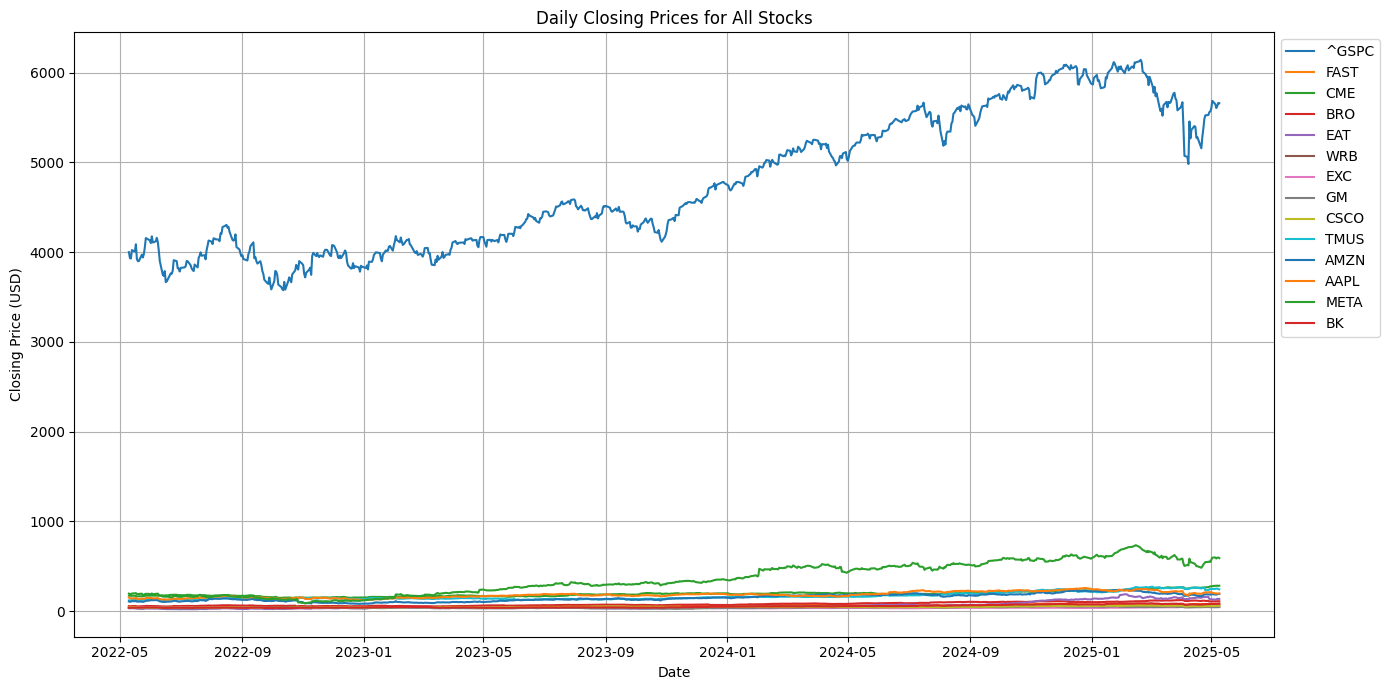

In [49]:
import matplotlib.pyplot as plt

close_prices = {}

for ticker in hists:
    df = hists[ticker]
    if not df.empty:
        close_prices[ticker] = df['Close']

close_df = pd.DataFrame(close_prices)
plt.figure(figsize=(14, 7))
for col in close_df.columns:
    plt.plot(close_df.index, close_df[col], label=col)
plt.title('Daily Closing Prices for All Stocks')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.grid(True)
plt.tight_layout()
plt.show()

In [50]:
pip install newsapi-python

In [51]:
from newsapi import NewsApiClient
import pandas as pd

In [52]:
newsapi = NewsApiClient(api_key="67d55b68d0f24b678a0f0f9024f89049")

In [53]:
from datetime import timedelta

# Find the latest date from all stock data
latest_common_date = max(
    df.index.max() for df in hists.values()
).date()

start_date = latest_common_date - timedelta(days=7)
end_date = latest_common_date


In [ ]:
from datetime import datetime, timedelta
from newsapi import NewsApiClient
import pandas as pd



stocks = ['^GSPC', 'FAST', 'CME', 'BRO', 'EAT', 'WRB', 'EXC', 'GM', 'CSCO', 'TMUS', 'AMZN', 'AAPL', 'META', 'BK']
end_date = datetime.today()
start_date = end_date - timedelta(days=7)

all_news = []

for ticker in stocks:
    try:
        response = newsapi.get_everything(
            q=f"{ticker}",  # You could also map to company names if desired
            language="en",
            sort_by="publishedAt",
            page_size=100,
            from_param=start_date.strftime("%Y-%m-%d"),
            to=end_date.strftime("%Y-%m-%d")
        )

        articles = response["articles"]
        temp_df = pd.DataFrame(articles)[["title", "publishedAt"]]
        temp_df.columns = ["Headline", "date"]
        temp_df["date"] = pd.to_datetime(temp_df["date"]).dt.tz_localize(None).dt.normalize()
        temp_df["Ticker"] = ticker  # associate with stock
        all_news.append(temp_df)

    except Exception as e:
        print(f"Error fetching for {ticker}: {e}")

# Combine all ticker news
df_news = pd.concat(all_news, ignore_index=True)

# Show result
print("News headlines from:", df_news["date"].min(), "to", df_news["date"].max())
print(df_news.head())


Error fetching for ^GSPC: "None of [Index(['title', 'publishedAt'], dtype='object')] are in the [columns]"


In [ ]:
pip install vaderSentiment


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

# Add sentiment scores
df_news["Positive"] = df_news["Headline"].apply(lambda x: sia.polarity_scores(x)["pos"])
df_news["Neutral"]  = df_news["Headline"].apply(lambda x: sia.polarity_scores(x)["neu"])
df_news["Negative"] = df_news["Headline"].apply(lambda x: sia.polarity_scores(x)["neg"])
df_news["Compound"] = df_news["Headline"].apply(lambda x: sia.polarity_scores(x)["compound"])

print(df_news.head())

In [ ]:
# Prepare your S&P 500 price data
sp500_df = hists['^GSPC'].copy().reset_index()
sp500_df.rename(columns={"Date": "date"}, inplace=True)
sp500_df["date"] = pd.to_datetime(sp500_df["date"]).dt.normalize()

# Merge with headlines
df_news["date"] = pd.to_datetime(df_news["date"]).dt.tz_localize(None).dt.normalize()
sp500_df["date"] = pd.to_datetime(sp500_df["date"]).dt.tz_localize(None).dt.normalize()
merged = pd.merge(sp500_df, df_news, on="date", how="inner")

print("Merged shape:", merged.shape)
print(merged.head())


In [ ]:
df["Tomorrow"] = df["Close"].shift(-1)
df["Target"] = (df["Tomorrow"] > df["Close"]).astype(int)


In [ ]:
# Step 1: Average sentiment scores by date
sentiment_daily = df_news.groupby("date")[["Positive", "Neutral", "Negative", "Compound"]].mean().reset_index()

# Step 2: Rebuild merged_stocks using one row per day
merged_stocks = {}
feature_matrices = {}

for ticker in stocks:
    df = hists[ticker].copy().reset_index()
    df.rename(columns={"Date": "date"}, inplace=True)
    df["date"] = pd.to_datetime(df["date"]).dt.tz_localize(None).dt.normalize()

    # Merge with one sentiment row per day
    merged_df = pd.merge(df, sentiment_daily, on="date", how="inner")

    if len(merged_df) < 2:
        print(f"{ticker}: Skipped (only {len(merged_df)} matching date)")
        continue

    # Generate Tomorrow & Target columns
    merged_df["Tomorrow"] = merged_df["Close"].shift(-1)
    merged_df["Target"] = (merged_df["Tomorrow"] > merged_df["Close"]).astype(int)
    merged_df.dropna(subset=["Tomorrow"], inplace=True)

    # Save merged data
    merged_stocks[ticker] = merged_df

    # Save feature matrix
    feature_matrices[ticker] = {
        "X": merged_df[["Open", "High", "Low", "Close", "Volume", "Positive", "Neutral", "Negative", "Compound"]],
        "y": merged_df["Target"]
    }

    print(f"{ticker}: {len(merged_df)} usable rows, Target counts → {merged_df['Target'].value_counts().to_dict()}")


In [ ]:
# Reconstruct full DataFrame with features and target
df = merged_stocks["AAPL"].copy()
df["Tomorrow"] = df["Close"].shift(-1)
df["Target"] = (df["Tomorrow"] > df["Close"]).astype(int)

# Drop rows with missing values
df.dropna(subset=["Tomorrow", "Target"], inplace=True)

# Select relevant columns to inspect
columns_to_show = ["date", "Open", "High", "Low", "Close", "Volume",
                   "Positive", "Neutral", "Negative", "Compound", "Target"]
df[columns_to_show].head(10)


In [ ]:
merged_stocks["AAPL"].head()

In [ ]:
for df in merged_stocks.values():
    if "Dividends" in df: del df["Dividends"]
    if "Stock Splits" in df: del df["Stock Splits"]


In [ ]:
merged_stocks["META"][["date", "Close"]].tail(10)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

results = []

for ticker, data in feature_matrices.items():
    X = data["X"]
    y = data["y"]

    # Skip stocks with only one class in the target
    if len(y.unique()) < 2:
        print(f"{ticker}: Skipped (only one class present)")
        continue

    # Split into train/test
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    # Train the model
    model = RandomForestClassifier(n_estimators=100, random_state=1)
    model.fit(X_train, y_train)

    # Predict and evaluate
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    results.append((ticker, accuracy))
    print(f"{ticker}: Accuracy = {accuracy:.2f}")

# Sort results by accuracy (high to low)
results.sort(key=lambda x: x[1], reverse=True)

# Final performance summary
print("\nModel Performance Summary:")
for ticker, acc in results:
    print(f"{ticker}: {acc:.2%}")


In [ ]:
# Step 1: Aggregate sentiment scores by date
sentiment_daily = df_news.groupby("date")[["Positive", "Neutral", "Negative", "Compound"]].mean().reset_index()

# Step 2: Merge with stock prices + build feature matrices
from datetime import datetime

feature_matrices = {}
merged_stocks = {}

for ticker in stocks:
    df = hists[ticker].copy().reset_index()
    df.rename(columns={"Date": "date"}, inplace=True)
    df["date"] = pd.to_datetime(df["date"]).dt.tz_localize(None).dt.normalize()

    merged_df = pd.merge(df, sentiment_daily, on="date", how="inner")
    merged_df.sort_values("date", inplace=True)

    # Add Target
    merged_df["Tomorrow"] = merged_df["Close"].shift(-1)
    merged_df["Target"] = (merged_df["Tomorrow"] > merged_df["Close"]).astype(int)
    merged_df.dropna(subset=["Tomorrow"], inplace=True)

    # Save full merged df (optional)
    merged_stocks[ticker] = merged_df

    # Save feature matrix
    feature_matrices[ticker] = {
        "X": merged_df[["Open", "High", "Low", "Close", "Volume", "Positive", "Neutral", "Negative", "Compound"]],
        "y": merged_df["Target"]
    }

    print(f"{ticker}: Target counts → {merged_df['Target'].value_counts().to_dict()}")


In [ ]:
print("Available tickers in merged_stocks:", list(merged_stocks.keys()))


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# Ensure merged_stocks and df_news are available
# If not, this will fail. This code assumes they are already loaded in memory.

# 1. Build average sentiment per stock from merged_stocks
sentiment_summary = []
for ticker in stocks:
    if ticker in merged_stocks:
        df = merged_stocks[ticker]
        if not df.empty:
            sentiment_summary.append({
                "Ticker": ticker,
                "Positive": df["Positive"].mean(),
                "Neutral": df["Neutral"].mean(),
                "Negative": df["Negative"].mean(),
                "Target": df["Target"].iloc[-1] if "Target" in df.columns else None
            })

df_sentiment = pd.DataFrame(sentiment_summary)

# 2. Bar Chart: Sentiment per stock
plt.figure(figsize=(12, 6))
bar_width = 0.25
index = range(len(df_sentiment))

plt.bar([i - bar_width for i in index], df_sentiment["Positive"], width=bar_width, color='green', label='Positive')
plt.bar(index, df_sentiment["Neutral"], width=bar_width, color='orange', label='Neutral')
plt.bar([i + bar_width for i in index], df_sentiment["Negative"], width=bar_width, color='red', label='Negative')

plt.xlabel("Stock Ticker")
plt.ylabel("Average Sentiment Score")
plt.title("Average Sentiment Scores per Stock (from merged_stocks)")
plt.xticks(index, df_sentiment["Ticker"])
plt.legend()
plt.tight_layout()
plt.show()

# 3. Bar Chart: Target (Up/Down)
plt.figure(figsize=(10, 4))
plt.bar(df_sentiment["Ticker"], df_sentiment["Target"],
        color=['green' if t == 1 else 'red' for t in df_sentiment["Target"]])
plt.title("Target Column: Did the Stock Close Higher Next Day?")
plt.xlabel("Stock Ticker")
plt.ylabel("Target (1 = Up, 0 = Down)")
plt.ylim(0, 1.1)
plt.tight_layout()
plt.show()

# 4. Table of Headlines with Sentiment from df_news
headline_table = df_news[["date", "Headline", "Positive", "Neutral", "Negative", "Compound"]].copy()
headline_table.sort_values("date", inplace=True)
display(headline_table)

# Optional: Save to CSV
headline_table.to_csv("real_headlines_with_sentiment.csv", index=False)
df_sentiment.to_csv("sentiment_per_stock_summary.csv", index=False)
